## Exercise: Inside AirBnB

For this lab’s exercise we are going to answer a few questions about AirBnB listings to get a better understanding of how to perform EDA in Python. Spurred by Prop F in San Francisco, imagine you are the mayor of your respective city and need to decide what impact AirBnB has had on your own housing situation. We will use visualization to both better understand our own city and potentially communicate these findings to the public at large.

> I will explore SF's data, but the techniques should be generally applicable to any city.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook

output_notebook()

Loading BokehJS ...

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Initial EDA with pandas

Download the data for your assigned city (listings.csv summary information): http://insideairbnb.com/get-the-data.html

In [3]:
df = pd.read_csv('data/sf_listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1162609,Lovely One Bedroom Apartment,6368122,Taylor,NaN,Seacliff,37.785217,-122.488655,Entire home/apt,350,4,8,2015-09-17,0.28,1,90
1,6032828,Historic Seacliff Home,30384615,Patricia,NaN,Seacliff,37.783658,-122.489398,Entire home/apt,300,1,0,NaN,NaN,1,173
2,6938818,Best Secret in Town,36381578,Harris,NaN,Seacliff,37.781505,-122.504754,Private room,119,1,10,2015-10-08,2.33,1,341
3,8087607,Single Room Beautiful Beach Condo,3264449,Keith,NaN,Seacliff,37.775318,-122.511621,Private room,79,1,0,NaN,NaN,1,40
4,4781448,3 Bd 2.5 Ba Full Flat Condo w Views,13112558,Pam,NaN,Seacliff,37.781797,-122.492492,Entire home/apt,695,2,1,2015-08-11,0.36,1,23


### Using pandas answer the following questions with summary statistics (just numbers, no charts):

* How many neighborhoods?
* Most common room_type
* Neighborhood with the most # of listings
* User with the most # of listings
* Most expensive neighborhood (median price)
* Listing with most # of reviews

In [4]:
neighborhoods = df.neighbourhood.unique()

print neighborhoods
print "\n"
print "There are {0} neighborhoods in San Francisco".format(len(neighborhoods))

['Seacliff' 'Haight Ashbury' 'Outer Mission' 'Downtown/Civic Center'
 'Diamond Heights' 'Lakeshore' 'Russian Hill' 'Noe Valley' 'Inner Sunset'
 'Treasure Island/YBI' 'Outer Richmond' 'Crocker Amazon' 'Excelsior'
 'Parkside' 'Financial District' 'Ocean View' 'Mission'
 'West of Twin Peaks' 'Inner Richmond' 'Marina' 'Bayview'
 'Visitacion Valley' 'Pacific Heights' 'Presidio Heights' 'South of Market'
 'Glen Park' 'Potrero Hill' 'Castro/Upper Market' 'Twin Peaks'
 'Bernal Heights' 'Chinatown' 'North Beach' 'Presidio' 'Nob Hill'
 'Outer Sunset' 'Western Addition' 'Golden Gate Park']


There are 37 neighborhoods in San Francisco


In [5]:
listing_types = df.room_type.value_counts()
print "'{0}' is the most common listing type with {1} total listings".format(listing_types.index[0], listing_types[0])

'Entire home/apt' is the most common listing type with 4033 total listings


In [6]:
df.groupby('neighbourhood').count().sort_values('id', ascending=False).iloc[0]

id                                922
name                              922
host_id                           922
host_name                         860
neighbourhood_group                 0
latitude                          922
longitude                         922
room_type                         922
price                             922
minimum_nights                    922
number_of_reviews                 922
last_review                       785
reviews_per_month                 785
calculated_host_listings_count    922
availability_365                  922
Name: Mission, dtype: int64

In [7]:
# let's make a function since we might want to ask the same question for other columns
def most(df, column):
    return df.groupby(column).count().sort_values('id', ascending=False).iloc[0]

In [8]:
# Host with the most has 38 listings!
most(df, 'host_id')

id                                38
name                              38
host_name                         34
neighbourhood_group                0
neighbourhood                     38
latitude                          38
longitude                         38
room_type                         38
price                             38
minimum_nights                    38
number_of_reviews                 38
last_review                       22
reviews_per_month                 22
calculated_host_listings_count    38
availability_365                  38
Name: 6346492, dtype: int64

In [9]:
# Presidio is the most expensive neighborhood
df.groupby('neighbourhood')['price'].median().sort_values(ascending=False)

neighbourhood
Presidio                 265.0
Marina                   229.0
Seacliff                 224.0
Pacific Heights          210.0
Russian Hill             207.5
North Beach              195.0
Presidio Heights         194.5
Financial District       190.0
Potrero Hill             180.0
Castro/Upper Market      180.0
Noe Valley               180.0
Nob Hill                 179.0
South of Market          175.0
Glen Park                175.0
Haight Ashbury           175.0
Downtown/Civic Center    169.0
Golden Gate Park         168.0
Twin Peaks               167.0
Western Addition         165.0
Diamond Heights          156.5
Mission                  150.0
Bernal Heights           150.0
Chinatown                150.0
Inner Sunset             150.0
Inner Richmond           150.0
Outer Richmond           142.5
West of Twin Peaks       130.0
Outer Mission            129.0
Bayview                  107.5
Crocker Amazon           105.0
Lakeshore                105.0
Parkside                 

In [10]:
# looks like Kepa tops the charts... and has possibly 3 identical listings
df.sort_values('number_of_reviews', ascending=False).head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4718,33577,Potrero Hill Garden Suite,145258,Kepa,NaN,Potrero Hill,37.765146,-122.397501,Entire home/apt,190,1,394,2015-10-30,7.04,4,324
2776,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.755592,-122.423657,Private room,120,1,352,2015-10-20,4.62,1,320
4700,205842,Potrero Hill Garden Cabana,145258,Kepa,NaN,Potrero Hill,37.764874,-122.397627,Entire home/apt,190,1,349,2015-10-29,8.73,4,316
4719,33578,Potrero Hill Garden Lookout,145258,Kepa,NaN,Potrero Hill,37.765256,-122.397305,Entire home/apt,190,1,328,2015-10-27,5.26,4,312
4752,256148,Spacious Bed/Bath Suite in Castro,1239523,Chris,NaN,Castro/Upper Market,37.758759,-122.434729,Private room,139,1,278,2015-10-28,5.76,1,323
5062,12522,Perfectly located Castro,18431,Brenda,NaN,Castro/Upper Market,37.760722,-122.428153,Private room,69,3,273,2015-10-30,3.87,1,15
2449,748222,Sunny Room Heart of the Mission!,516404,Michael And Yesica,NaN,Mission,37.756212,-122.415546,Private room,100,1,268,2015-10-29,7.40,2,264
2447,748256,Valencia Corridor Center Of It All!,516404,Michael And Yesica,NaN,Mission,37.754954,-122.416831,Private room,100,1,265,2015-10-28,7.32,2,310
1589,545685,Garden Suite Private Bathrm GGPark,2676602,Su,NaN,Outer Richmond,37.776190,-122.482308,Private room,99,1,251,2015-10-30,6.16,2,321
4615,683190,Spacious - 3000 sq. ft. SF LOFT,1545166,John,NaN,Potrero Hill,37.755311,-122.385177,Entire home/apt,250,1,246,2015-10-27,6.45,1,325


In [145]:
median_nights = df.groupby('host_id')['availability_365'].median()
median_df = pd.DataFrame(median_nights).reset_index()
median_df.columns = ['host_id', 'median_listing_availability']

# Some hosts would circumvent Prop F by renting out all of the rooms of a apartment, but list them as
# shared rooms. This is more like a hostel.
df.merge(median_df, on='host_id') \
  .groupby('host_id').first() \
  .sort_values('calculated_host_listings_count', ascending=False) \
  .head(20)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,median_listing_availability
host_id,,,,,,,,,,,,,,,,
6346492,7958349,Downtown Top U. Sq. Hotel/TS Studio,Dana,NaN,Downtown/Civic Center,37.788465,-122.409592,Entire home/apt,180,1,0,2015-10-14,0.93,34,36,18.0
7206100,6742488,Looky Home Moscone,NaN,NaN,Financial District,37.782433,-122.401098,Shared room,65,30,4,2015-10-05,2.35,31,317,365.0
38836,10828,Haight - Buena Vista Park 1BR,Bernat,NaN,Haight Ashbury,37.769725,-122.438780,Entire home/apt,171,3,15,2015-09-28,0.46,28,267,267.5
23429336,7292853,3br/2ba apt by Golden Gate Park!,NaN,NaN,Outer Richmond,37.777021,-122.488989,Entire home/apt,190,30,4,2015-08-10,1.14,24,365,348.5
4581592,9186095,"SF, Golden Gate, Castro, Wine-Bunk5",Erik,NaN,Parkside,37.742180,-122.471665,Shared room,39,3,0,2015-10-14,2.73,22,365,365.0
1091811,1864687,Sunlit Cottage in Russian Hill,Sean,NaN,Russian Hill,37.798802,-122.415641,Entire home/apt,229,5,30,2014-10-29,1.24,20,0,0.0
11186281,4839456,Single bed in a spacious loft,Francesca & Team,NaN,South of Market,37.780413,-122.406470,Shared room,70,7,2,2015-06-13,0.40,17,257,364.0
305973,687430,Mission Outr CozyBedRm3 + MinFridge,NaN,NaN,Excelsior,37.729604,-122.427285,Private room,40,30,12,2015-08-23,0.33,16,318,319.0
1682188,7762892,Hacknsleep(com)/1-roomfor2,Zarina&Yaroslav,NaN,Parkside,37.741953,-122.486760,Shared room,45,1,4,2015-10-19,1.85,16,365,365.0


### Time to visualize! Using pandas (and matplotlib) create a visualization of each of the following:
* Distribution of room_type (for entire city)
* Histogram of # of listings per neighborhood
* Histogram of # of listings for each user
* City wide distribution of listing price
* Distribution of median listing price per neighborhood
* Histogram of number of reviews per listing

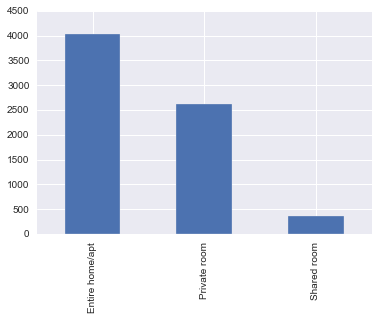

In [11]:
df.room_type.value_counts().plot.bar()

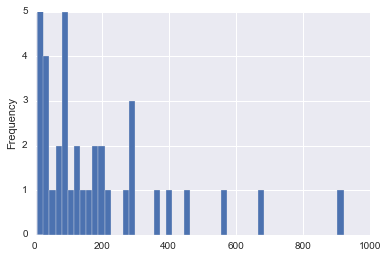

In [12]:
df.groupby('neighbourhood').count()['id'].plot.hist(bins=50)

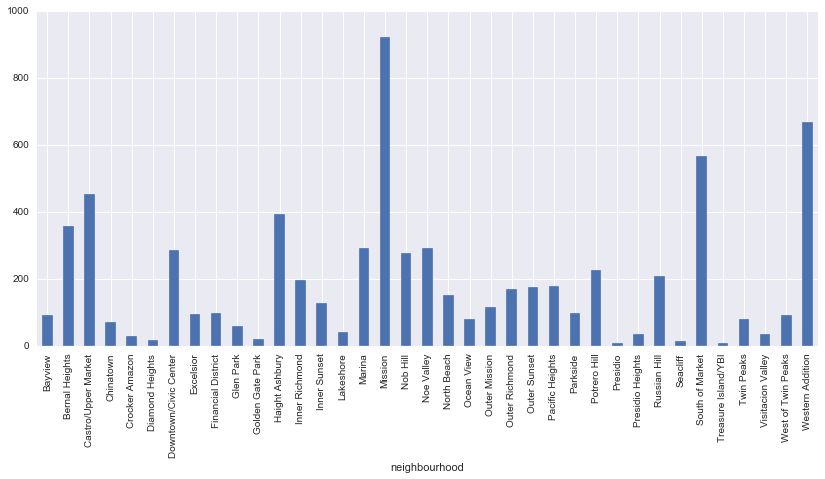

In [13]:
# Since SF doesn't have many neighborhoods (comparatively) we can also see the raw # per neighborhood
df.groupby('neighbourhood').count()['id'].plot.bar(figsize=(14,6))

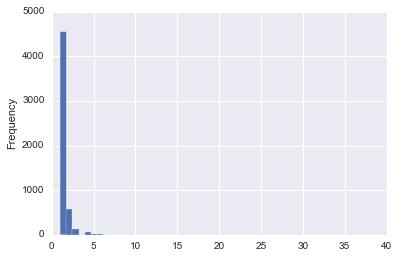

In [14]:
df.groupby('host_id').count()['id'].plot.hist(bins=50)

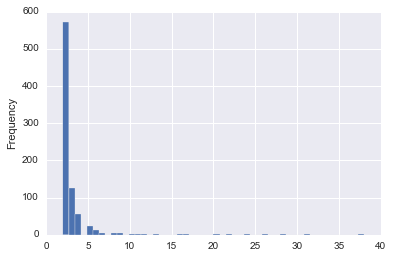

In [15]:
# let's zoom in to the tail
subselect = df.groupby('host_id').count()['id']
subselect[subselect > 1].plot.hist(bins=50)

In [16]:
def scale_free_plot(df, num):
    subselect = df.groupby('host_id').count()['id']
    return subselect[subselect > num].plot.hist(bins=75)

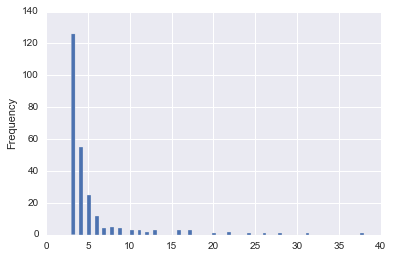

In [17]:
scale_free_plot(df, 2)

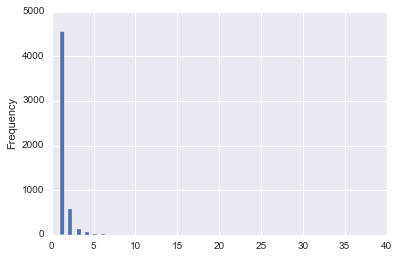

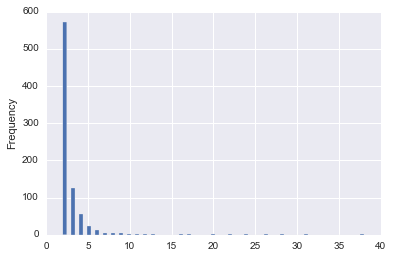

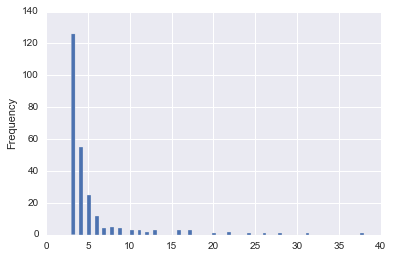

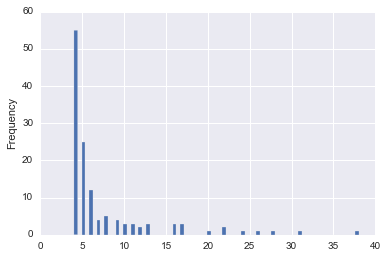

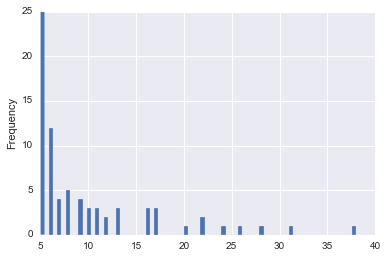

In [18]:
# the shape of the distribution stays relatively the same as we subselect
for i in range(5):
    scale_free_plot(df, i)
    plt.show()

### Scatterplot Matrix

In an effort to find potential correlations (or outliers) you want a little bit more fine grained loot at the data. Create a scatterplot matrix of the data for your city. http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-scatter-matrix

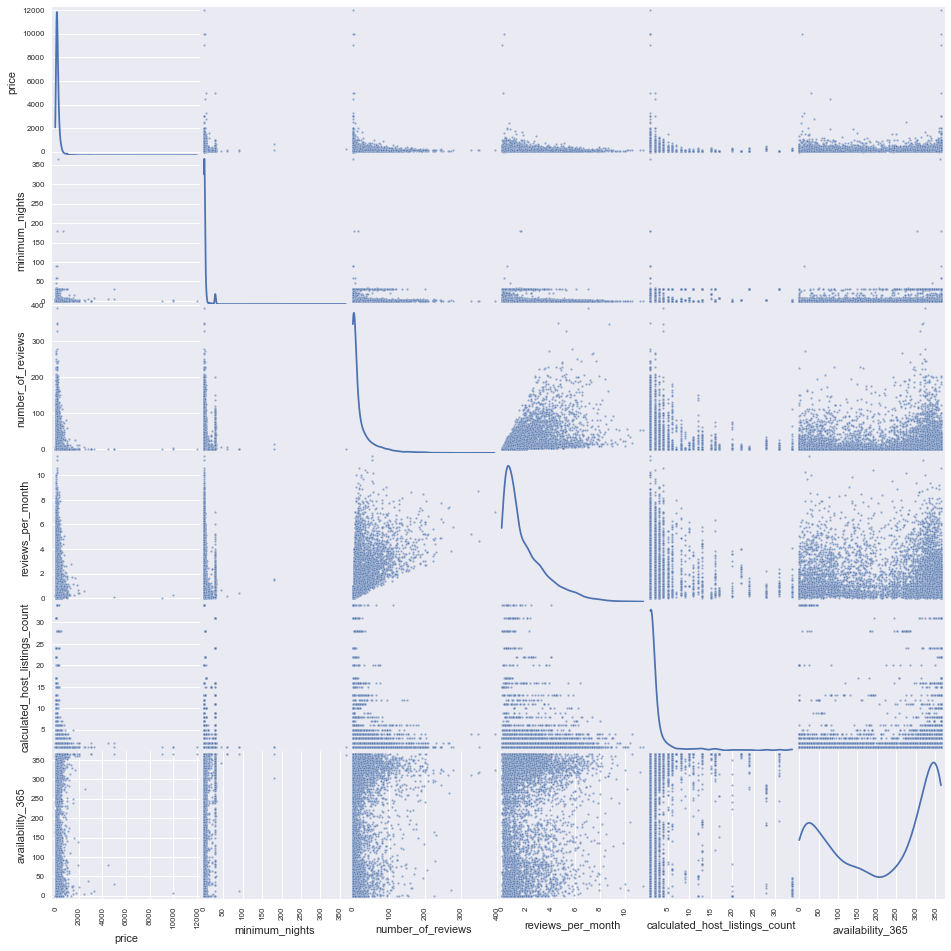

In [19]:
from pandas.tools.plotting import scatter_matrix

# it only makes sense to plot the continuous columns
continuous_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', \
           'calculated_host_listings_count','availability_365']

# semicolon prevents the axis objests from printing
scatter_matrix(df[continuous_columns], alpha=0.6, figsize=(16, 16), diagonal='kde');

#### Interesting insights from the scatter matrix:

* `price` heavily skewed towards cheap prices (with a few extreme outliers). `host_listings_count` and `number_of_reviews` have similar distributions.
* `minimum_nights` has a sharp bimodal distribution.
* Listing are bimodal too and are either:
    * available for a relatively short period of the year
    * available for most of it (these are probably the ___"hotels"___)
* Host with a large number of listings have them each for a relative low price.
* Listings that are expensive have very few reviews (i.e. not many people stay at them)

### Prof F impact

What impact would a Prof F like policy have on your city? 
> Prop F would have removed all listings that are the Entire Home and available for more than 75 days per year

In [20]:
prop_f = df[(df.room_type == 'Entire home/apt') & (df.availability_365 > 75)]
print "Prof F would have removed {0} listings of {1} total listings. This is {2} of the listings for SF".format( \
       len(prop_f), len(df), len(prop_f) / float(len(df)))

Prof F would have removed 2825 listings of 7029 total listings. This is 0.401906387822 of the listings for SF


### Prof F Revenue Lost

What would AirBnB’s revenue loss have been from a passing of Prop F? Calculate revenue from the reviews_per_month, availability_365, and price for each listing.

In [21]:
'''
We of course have to make some assumptions about the data. The documentation on the Inside AirBnB site
can give us a lot of helpful context however: http://insideairbnb.com/about.html

Assumptions:
    * 6-12% Guest service fee and 3% host service fee. 9% - 15% in total 
    * A review rate of 72% is unverifiable - therefore 50% was chosen as it sits almost exactly between 72% and 30.5%.
'''

def revenue(row):
    # availability per month... also Python 2.7 does integer division
    availability_per_month = row.availability_365 / float(30)
    
    # Only 50% of people who stay write reviews
    stays_per_month = row.reviews_per_month * 2
    
    revenue_per_month = stays_per_month * availability_per_month * row.price
    
    return revenue_per_month

New Python string formatting: https://pyformat.info/

In [22]:
revenues_per_month = df.apply(revenue, axis=1)

message = '''
If Prop F passed, individual 'high occupancy' AirBnB host would have lost ${0:.2f}/month and collectively 
all the high occupancy hosts in the city would have lost approximately ${1:.3f} million/month.
'''

print message.format(revenues_per_month.median(), revenues_per_month.sum() / 1000000)


If Prop F passed, individual 'high occupancy' AirBnB host would have lost $2334.93/month and collectively 
all the high occupancy hosts in the city would have lost approximately $28.337 million/month.



In [23]:
# the most conservative estimate using the lowest guest service fee rate (6%).
# 6% (guest fee) + 3% (host fee) = 9% (airbnb revenue)
million_per_month = (revenues_per_month.sum() * 0.09) / float(1000000)
"This translates into ${0:.2f} million/month of lost revenue for AirBnB".format(million_per_month)

'This translates into $2.55 million/month of lost revenue for AirBnB'

In [24]:
context = '''In the grand scheme of things this is actually a non-trivial amount of revenue for AirBnB... 
Sources report that they make ~$900 million of revenue in 2015 (which equals $75 million/month).

And the SF revenue lost to Prop F would be {0}% of their total revenue.'''

print context.format((2.55/75) * 100)

In the grand scheme of things this is actually a non-trivial amount of revenue for AirBnB... 
Sources report that they make ~$900 million of revenue in 2015 (which equals $75 million/month).

And the SF revenue lost to Prop F would be 3.4% of their total revenue.


https://www.quora.com/How-much-revenue-is-Airbnb-making

https://www.airbnb.com/help/article/104/what-are-guest-service-fees

## Advanced Plots with Seaborn

### Make a violin plot of the price distribution of each neighborhood.
> If your city has a large number of neighborhoods plot the 10 with the most listing.


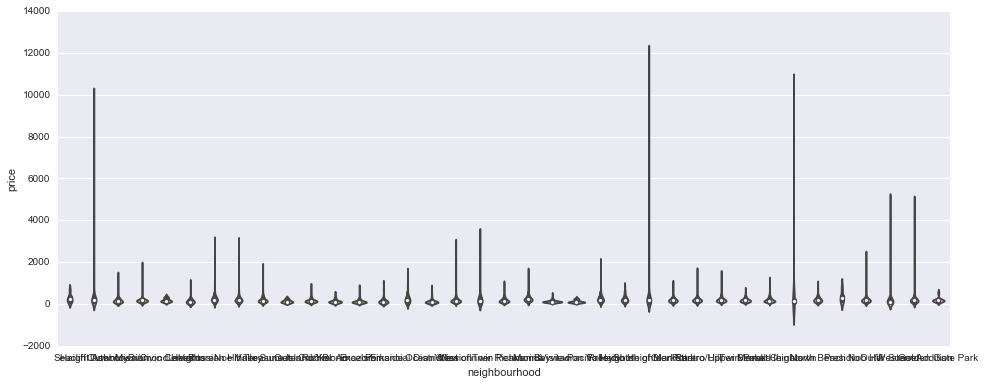

In [25]:
# just a tocuh hard to interpret...
plt.figure(figsize=(16, 6))
sns.violinplot(data=df, x='neighbourhood', y='price')

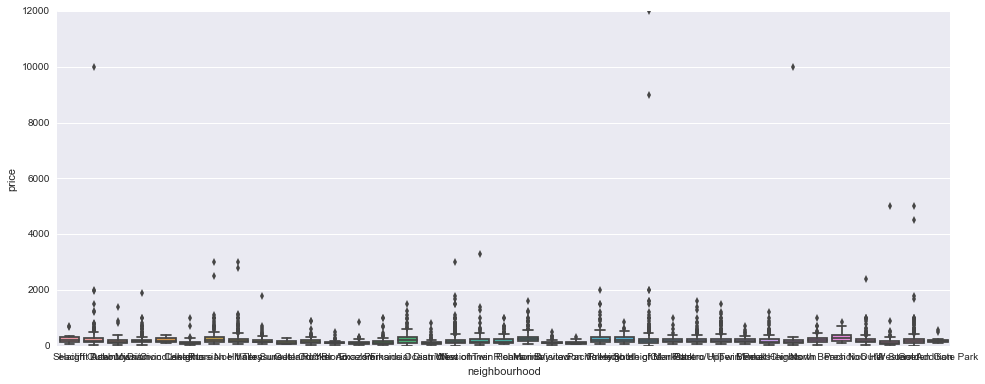

In [26]:
# boxplots can sometimes handle outliers better, we can see here there are some listings that are high priced extrema
plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='neighbourhood', y='price')

Lets try to only show the 10 neighborhoods with the most listings and to zoom in on the distribution of the lower prices (now that we can identify the outliers) we can remove listings priced at > $2000

In [27]:
top_neighborhoods = df.groupby('neighbourhood').count().sort_values('id', ascending = False).index[:10]
top_neighborhoods

Index([u'Mission', u'Western Addition', u'South of Market',
       u'Castro/Upper Market', u'Haight Ashbury', u'Bernal Heights', u'Marina',
       u'Noe Valley', u'Downtown/Civic Center', u'Nob Hill'],
      dtype='object', name=u'neighbourhood')

In [28]:
neighborhood_subset = df[df.neighbourhood.isin(top_neighborhoods)]

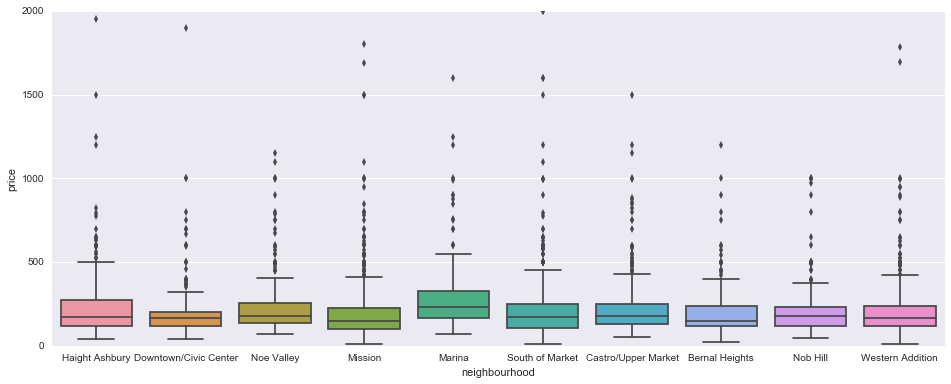

In [29]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=neighborhood_subset[neighborhood_subset.price < 2000], x='neighbourhood', y='price')

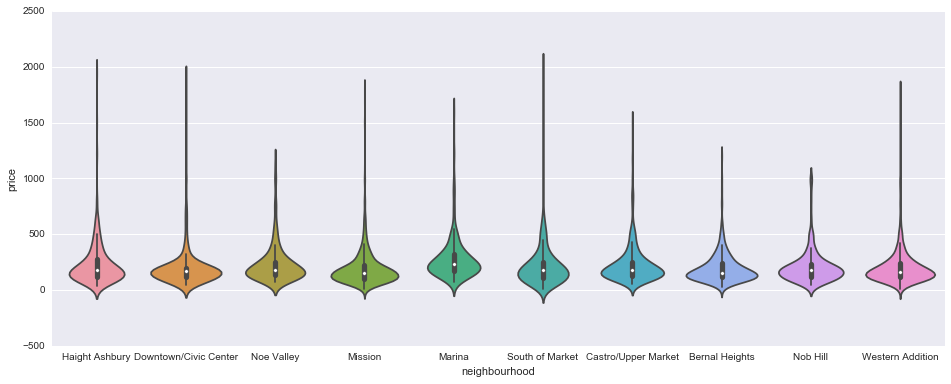

In [30]:
plt.figure(figsize=(16, 6))
sns.violinplot(data=neighborhood_subset[neighborhood_subset.price < 2000], x='neighbourhood', y='price')

### Boxplots vs. Violinplots

* Boxplot
  * Can be easier to interpret (a visual representation of point statistics, the quartiles)
  * Shows individual outlier data points (violinplot only shows range of outliers, max values) 
  * More common and familiar
  * Can be easier to compare a large number of boxplots
  * Can be easier to compare the spread (upper - lower quartile) of the values
* Violinplot
  * Shows more information (distribution rather than point statistic)
  * Will show bimodality (or more complex distribution of values, boxplot collapses this to one number)
  * Shows density of values

### To find potential features that correlate with the price, make a PairGrid of linear regressions (price will always be the dependent variable).


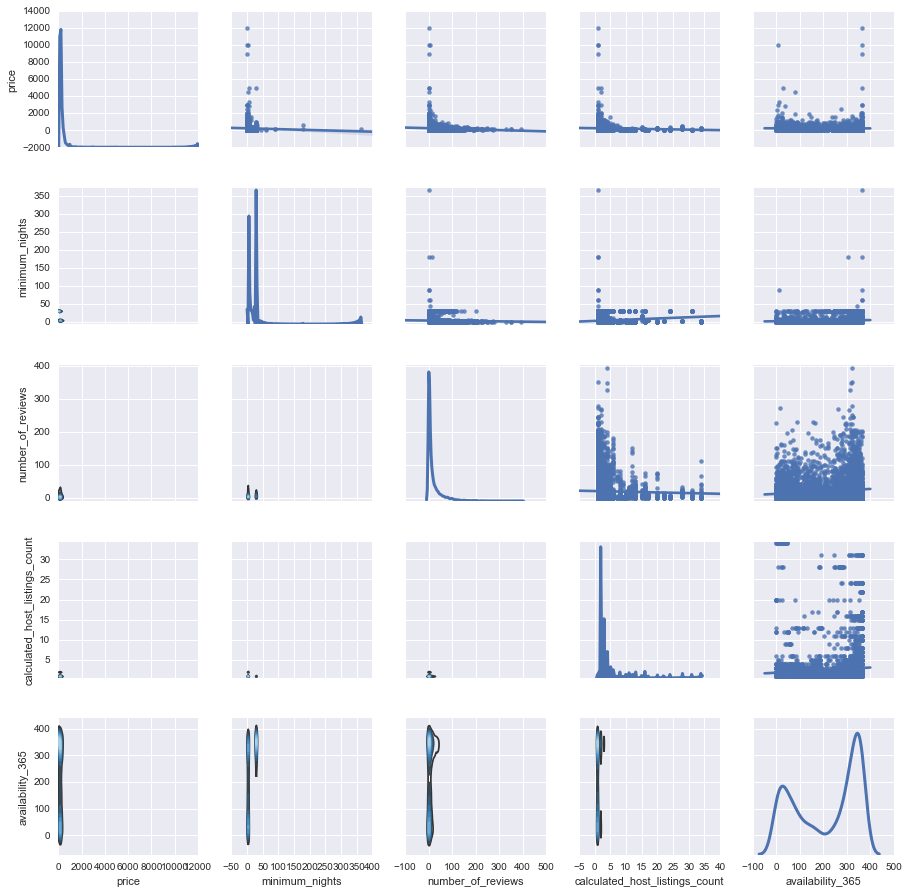

In [39]:
# it only makes sense to plot the continuous columns
continuous_columns = ['price', 'minimum_nights', 'number_of_reviews', \
           'calculated_host_listings_count','availability_365']

g = sns.PairGrid(df[continuous_columns], diag_sharey=False)
g.map_upper(sns.regplot, color=0.3)
g.map_diag(sns.kdeplot, lw=3)
g.map_lower(sns.kdeplot, cmap="Blues_d")

# save figure to inspect in higher detail
g.savefig("pair_regression.png", dpi=300)

In [40]:
!open pairgrid.png

In [49]:
df.index.isin(prop_f.index)

array([ True,  True, False, ..., False,  True, False], dtype=bool)

In [66]:
ho_columns = ['price', 'minimum_nights', 'number_of_reviews', \
           'calculated_host_listings_count']

high_occupancy = df[ho_columns]
high_occupancy.loc[df.index.isin(prop_f.index), 'High Occupancy'] = "> 75 days"
high_occupancy.loc[high_occupancy['High Occupancy'] != "> 75 days", 'High Occupancy'] = "< 75 days"
high_occupancy.head()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,High Occupancy
0,350,4,8,1,> 75 days
1,300,1,0,1,> 75 days
2,119,1,10,1,< 75 days
3,79,1,0,1,< 75 days
4,695,2,1,1,< 75 days


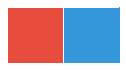

In [106]:
flatui = ["#e74c3c", "#3498db"]
sns.palplot(sns.color_palette(flatui))

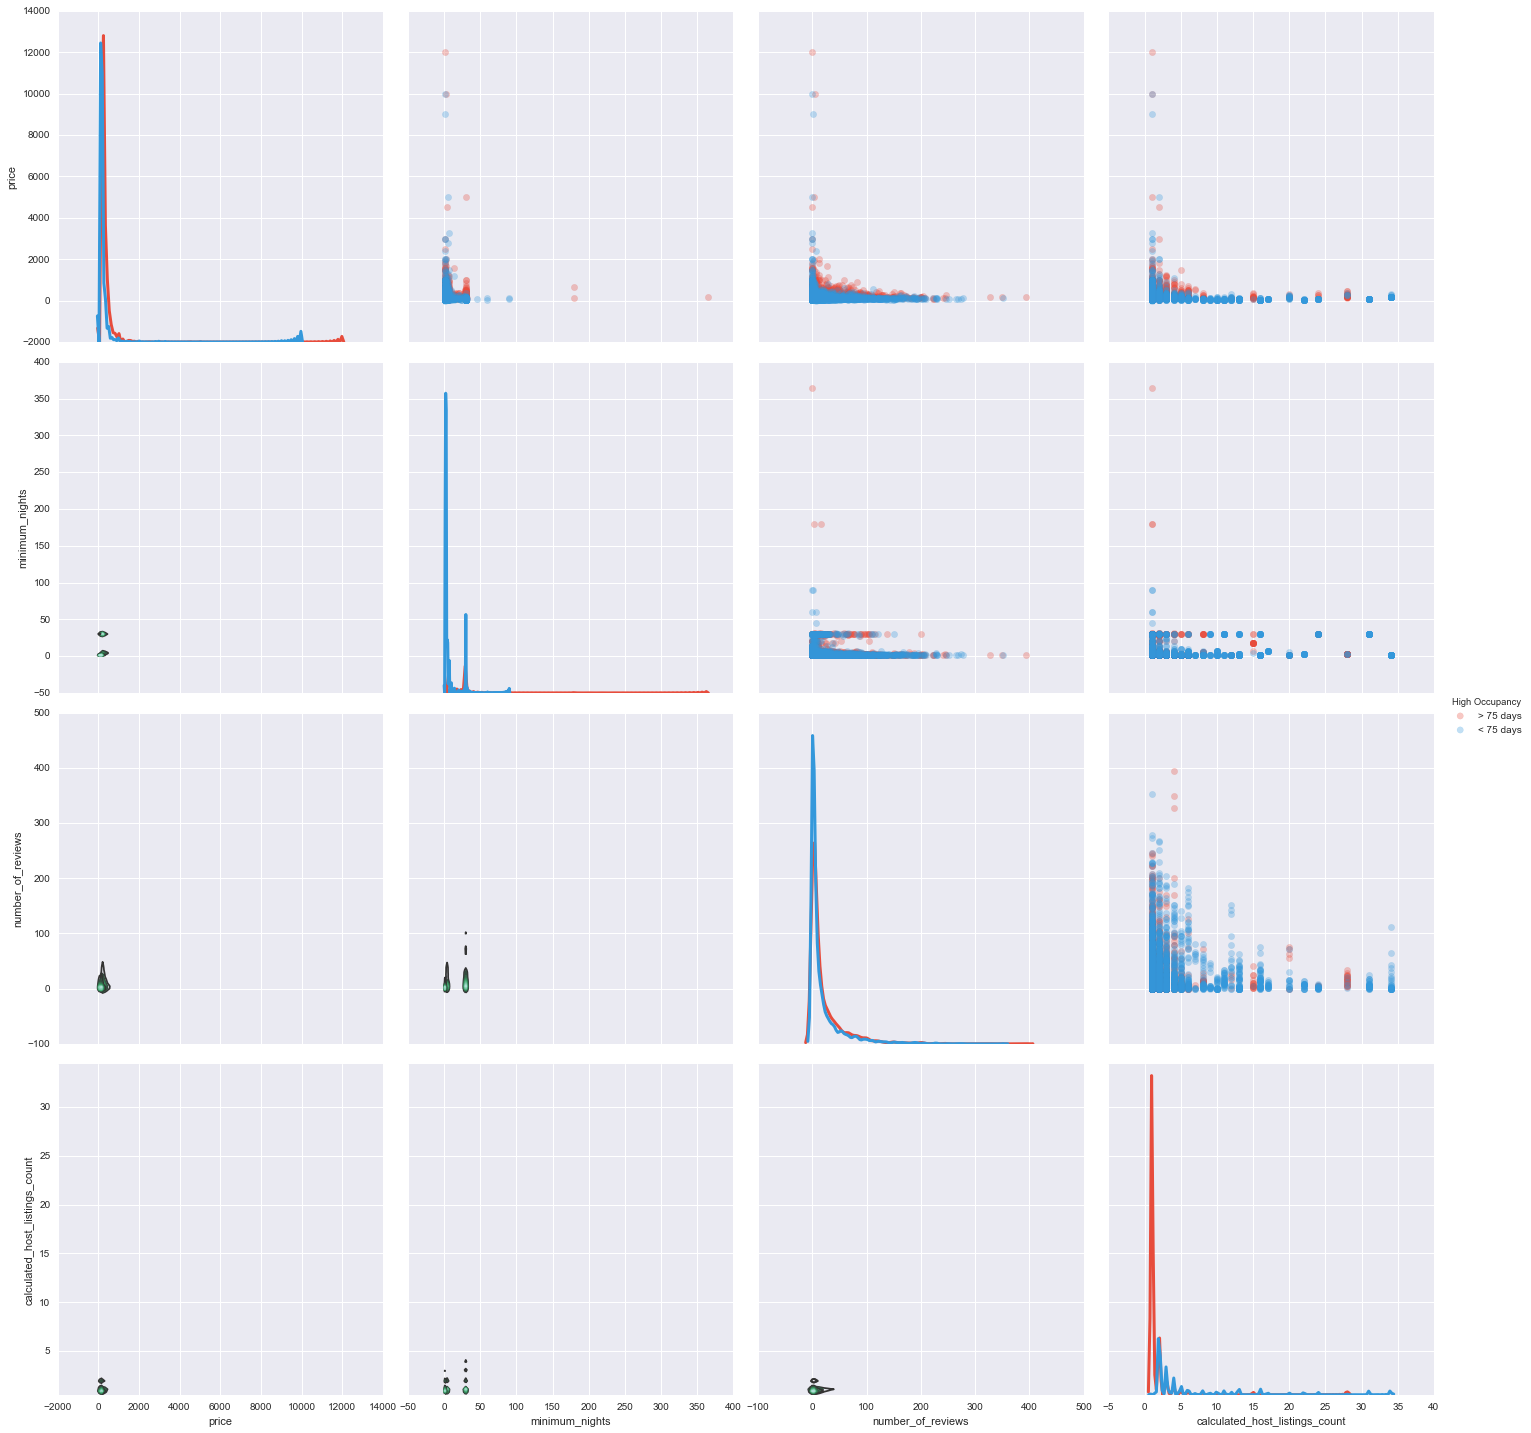

In [112]:
with sns.color_palette(flatui):
    # scatterplot alpha can help show clustering/overlap
    g = sns.PairGrid(high_occupancy, hue="High Occupancy", size=5, diag_sharey=False)
    g.map_lower(sns.kdeplot)
    g.map_diag(sns.kdeplot, lw=3)
    g.map_upper(plt.scatter, s=40, alpha=.3)
    g.add_legend()
    g.savefig("pairplot.png", dpi=300)